In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




In [5]:
movies= pd.read_csv("tmdb_5000_movies.csv")
credits=pd.read_csv("tmdb_5000_credits.csv")


In [6]:
movies=movies.merge(credits,on='title')


In [7]:
movies.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
#geners
#id
#keywoeds
movies=movies[["id","title","overview","genres","keywords","cast","crew"]]

In [9]:
#id, title,tags    PREPROCESSING
movies.isnull().sum()


id          0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [10]:
movies.dropna(inplace=True)

In [11]:
movies.duplicated().sum()

np.int64(0)

In [12]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [13]:
import ast

In [14]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [15]:
movies["genres"]=movies["genres"].apply(convert)

In [16]:
movies["keywords"]=movies["keywords"].apply(convert)


In [17]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
#first 3 actors of the movie
def convert3(obj):
    L=[]
    count=0
    for i in ast.literal_eval(obj):
        if count !=3:
            L.append(i['name'])
            count+=1
        else:
            break    
    return L

In [19]:
movies["cast"]=movies["cast"].apply(convert3)

In [20]:
movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [21]:
def director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i["job"]== 'Director':
            L.append(i['name'])
            break
    return L    

In [22]:
movies['crew']=movies['crew'].apply(director)

In [23]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [24]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [25]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])

In [26]:
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])

In [27]:
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])

In [28]:
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [29]:
movies['tags']=movies["overview"]+movies["genres"]+movies["keywords"]+movies["cast"]+movies["crew"]

In [30]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [31]:
movies1=movies[["id","title","tags"]]

In [32]:
movies1['tags']=movies1['tags'].apply(lambda x:" ".join(x))

C:\Users\ATHARV\AppData\Local\Temp\ipykernel_11176\2217650536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies1['tags']=movies1['tags'].apply(lambda x:" ".join(x))


In [33]:
movies1['tags']=movies1['tags'].apply(lambda x:x.lower())

C:\Users\ATHARV\AppData\Local\Temp\ipykernel_11176\3922730158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies1['tags']=movies1['tags'].apply(lambda x:x.lower())


In [34]:
movies1.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [35]:
movies1.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
#concatinate all the tags and filter out top 5000 words(W5000) with maximum frequency 
#check for the frequency of each word in all the movies(M5000)
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000,stop_words='english')

print("hello")



hello


In [37]:
vectors=cv.fit_transform(movies1['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4806, 5000))

In [38]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      shape=(5000,), dtype=object)

In [39]:
#nlp steming 
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [40]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y )        

In [41]:
movies1['tags']=movies1['tags'].apply(stem)

C:\Users\ATHARV\AppData\Local\Temp\ipykernel_11176\1494818750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies1['tags']=movies1['tags'].apply(stem)


In [42]:
movies1['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)


In [44]:
similarity[2]

array([0.05827165, 0.06451613, 1.        , ..., 0.02677398, 0.        ,
       0.        ], shape=(4806,))

In [58]:
def recommend(movie):
    movie_index=movies1[movies1['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key= lambda x:x[1])[1:6]
    for i in movies_list:
        print(movies1.iloc[i[0]].title  )
        
       
    


In [65]:
# to get the most simmilar movie to 1st
movie= input("Enter the Movie Name:")
print(movie)
print("You may like these Top 5 Movies if you watched:" +movie)
recommend(movie)

# recommend("Mission: Impossible")

Batman
You may like these Top 5 Movies if you watched:Batman
Batman
Batman & Robin
The Dark Knight Rises
Batman Begins
Batman Returns


Evaluating The Model:


In [47]:
print("Evalution of the Project using suitable maps:")
!pip install seaborn
import seaborn as sns

Evalution of the Project using suitable maps:



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Analyzing The relevance/similarity Of top 5 movies with the selected one


C:\Users\ATHARV\AppData\Local\Temp\ipykernel_11176\401039168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=titles, palette="rocket")


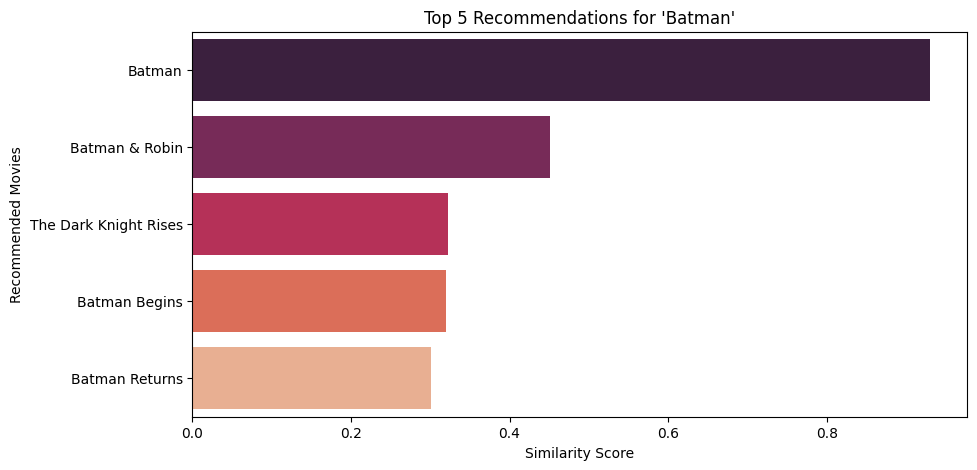

In [68]:
def analyze_recommendations(movie):
    # Get recommendations
    movie_index = movies1[movies1['title'] == movie].index[0]
    sim_scores = list(enumerate(similarity[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    
    # Get movie indices and similarity scores
    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    titles = [movies1.iloc[i]['title'] for i in movie_indices]
    
    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=scores, y=titles, palette="rocket")
    plt.title(f"Top 5 Recommendations for '{movie}'")
    plt.xlabel("Similarity Score")
    plt.ylabel("Recommended Movies")
    plt.show()
    
    return titles, scores

# Analyze for a specific movie
titles, scores = analyze_recommendations(movie)

Visualizing Top 15 Genres of the data set


C:\Users\ATHARV\AppData\Local\Temp\ipykernel_11176\1614565249.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="rocket")


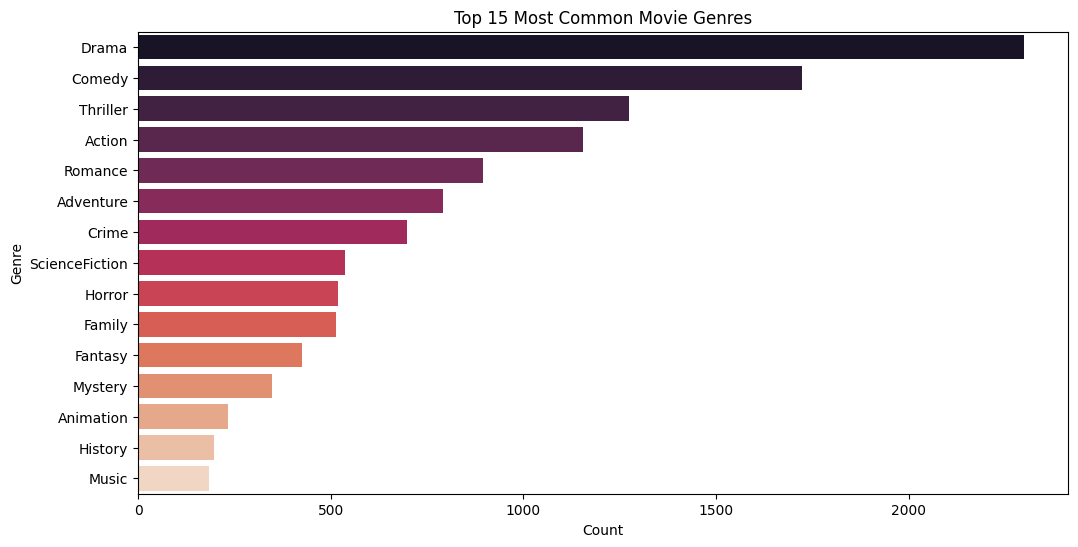

In [ ]:
genres = movies['genres'].apply(lambda x: [i.replace(" ", "") for i in x])

# Count genre occurrences
genre_counts = {}
for movie_genres in genres:
    for genre in movie_genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Sort and plot
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:15]
genres, counts = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(genres), palette="rocket")
plt.title("Top 15 Most Common Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()